# importing the essentials

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

### Getting a brief information about the data sets

In [3]:
print(train_df.shape)
print(test_df.shape)

(58645, 13)
(39098, 12)


In [4]:
print(f"\n{train_df.info()}")
print(train_df.isnull().sum())
print(train_df.duplicated())
print(train_df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [5]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,58645.0,29322.000000,16929.497605,0.00,14661.00,29322.00,43983.00,58644.00
person_age,58645.0,27.550857,6.033216,20.00,23.00,26.00,30.00,123.00
person_income,58645.0,64046.172871,37931.106979,4200.00,42000.00,58000.00,75600.00,1900000.00
person_emp_length,58645.0,4.701015,3.959784,0.00,2.00,4.00,7.00,123.00
loan_amnt,58645.0,9217.556518,5563.807384,500.00,5000.00,8000.00,12000.00,35000.00
loan_int_rate,58645.0,10.677874,3.034697,5.42,7.88,10.75,12.99,23.22
loan_percent_income,58645.0,0.159238,0.091692,0.00,0.09,0.14,0.21,0.83
cb_person_cred_hist_length,58645.0,5.813556,4.029196,2.00,3.00,4.00,8.00,30.00
loan_status,58645.0,0.142382,0.349445,0.00,0.00,0.00,0.00,1.00


there are outliers in age, income

In [6]:
train_df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


## Finfing the uniques and value cpunts

In [7]:
for item in train_df.columns[1:]:
    print(f'{item} : {train_df[item].unique()}')
    print('-'* 50)

person_age : [ 37  22  29  30  27  25  21  35  31  26  28  32  23  24  33  44  38  43
  46  48  36  41  34  40  47  42  51  50  39  56  60  49  58  54  45  59
  65  53  55  57  52  62  64  84  70  66  73  69  61  20  80  76 123]
--------------------------------------------------
person_income : [ 35000  56000  28800 ...  44955  90730 124600]
--------------------------------------------------
person_home_ownership : ['RENT' 'OWN' 'MORTGAGE' 'OTHER']
--------------------------------------------------
person_emp_length : [  0.   6.   8.  14.   2.   9.  11.   5.   1.  13.   3.  10.  12.   4.
   7.  21.  17.  16.  18.  19.  15.  20.  23.  24.  26.  22.  25.  41.
  27.  28.  35.  29.  30.  31. 123.  39.]
--------------------------------------------------
loan_intent : ['EDUCATION' 'MEDICAL' 'PERSONAL' 'VENTURE' 'DEBTCONSOLIDATION'
 'HOMEIMPROVEMENT']
--------------------------------------------------
loan_grade : ['B' 'C' 'A' 'D' 'E' 'F' 'G']
-------------------------------------------------

In [8]:
cat_col = train_df.select_dtypes(include=['object']).columns
for items in cat_col:
    print(f'{train_df[items].value_counts()}')
    print('-'* 50)

person_home_ownership
RENT        30594
MORTGAGE    24824
OWN          3138
OTHER          89
Name: count, dtype: int64
--------------------------------------------------
loan_intent
EDUCATION            12271
MEDICAL              10934
PERSONAL             10016
VENTURE              10011
DEBTCONSOLIDATION     9133
HOMEIMPROVEMENT       6280
Name: count, dtype: int64
--------------------------------------------------
loan_grade
A    20984
B    20400
C    11036
D     5034
E     1009
F      149
G       33
Name: count, dtype: int64
--------------------------------------------------
cb_person_default_on_file
N    49943
Y     8702
Name: count, dtype: int64
--------------------------------------------------


## EDA

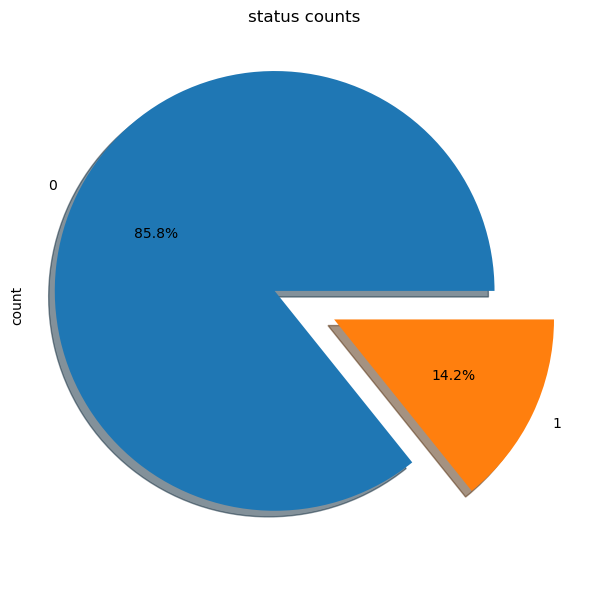

In [9]:
plt.figure(figsize=(8,6))
train_df['loan_status'].value_counts().plot.pie(autopct = '%1.1f%%', explode = [0.15, 0.15], shadow = True).set_title('status counts')
plt.tight_layout()
plt.show()

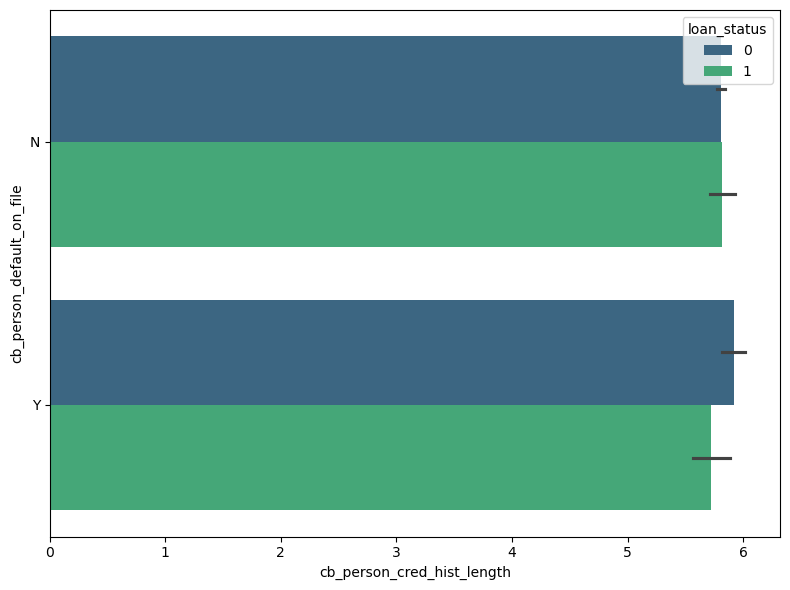

In [10]:
plt.figure(figsize=(8,6))
sns.barplot(data = train_df,  x = 'cb_person_cred_hist_length' ,y = 'cb_person_default_on_file', hue = 'loan_status', palette='viridis')
plt.tight_layout()
plt.show()

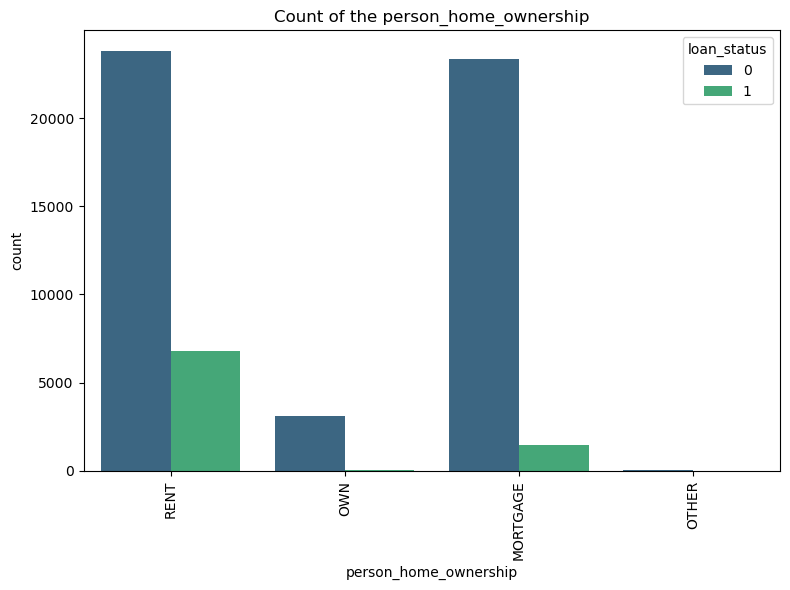

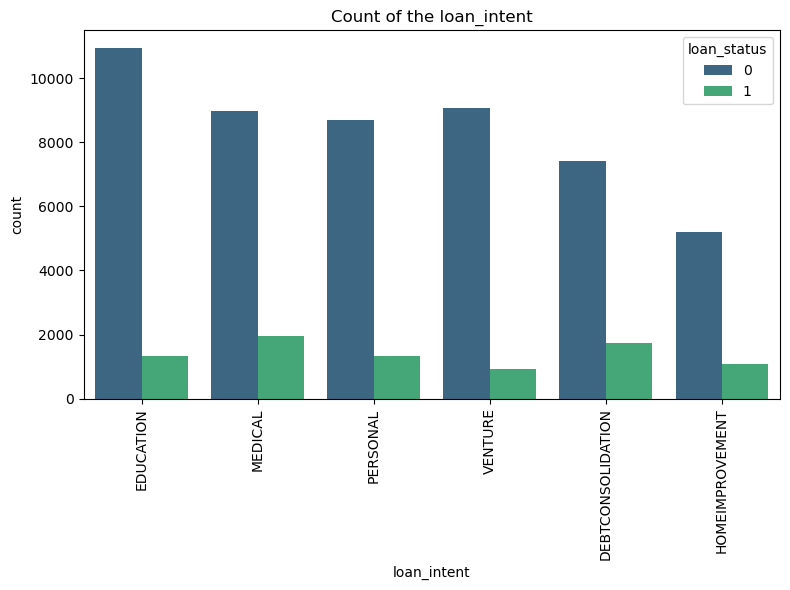

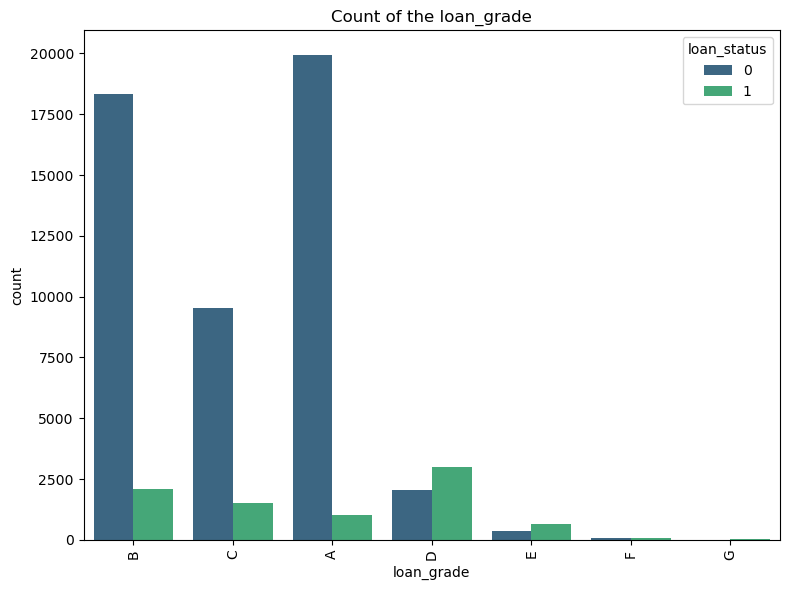

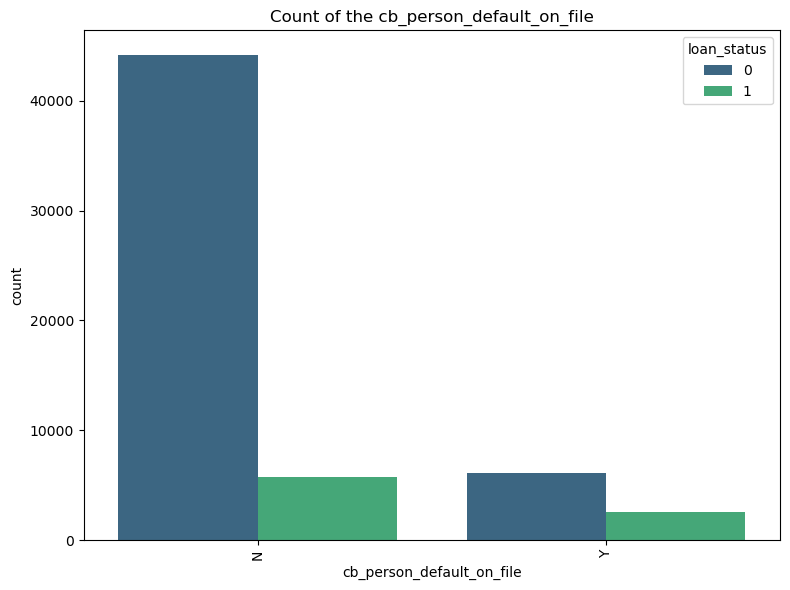

In [11]:
# plot for the count for categorical
for cols in cat_col:
    plt.figure(figsize=(8,6))
    sns.countplot(data=train_df, x = cols, hue="loan_status", palette='viridis')
    plt.title(f'Count of the {cols}')
    plt.xticks(rotation = 90)
    plt.tight_layout()
    plt.show()

In [12]:
train_df.columns

Index(['id', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status'],
      dtype='object')

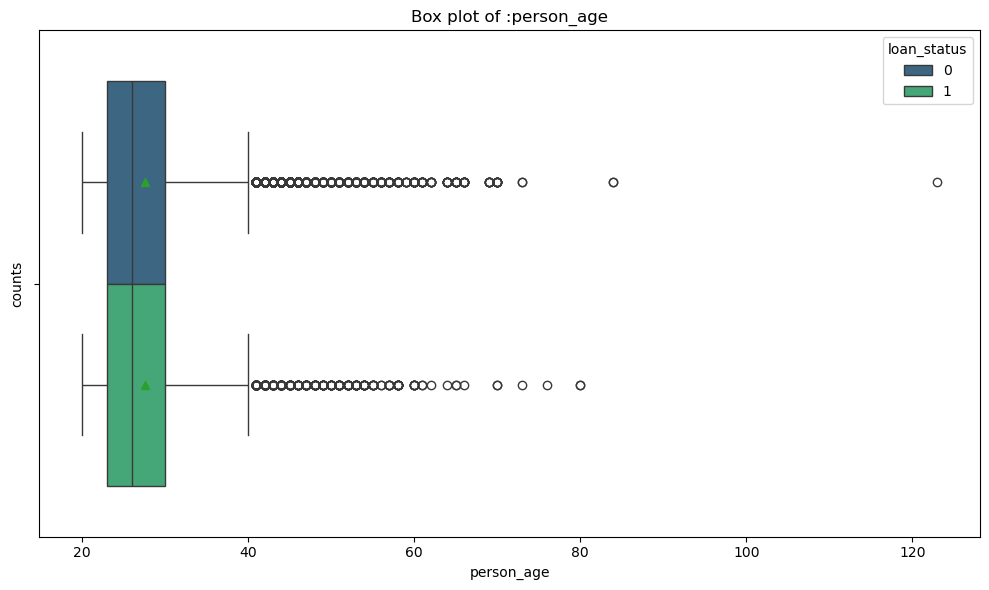

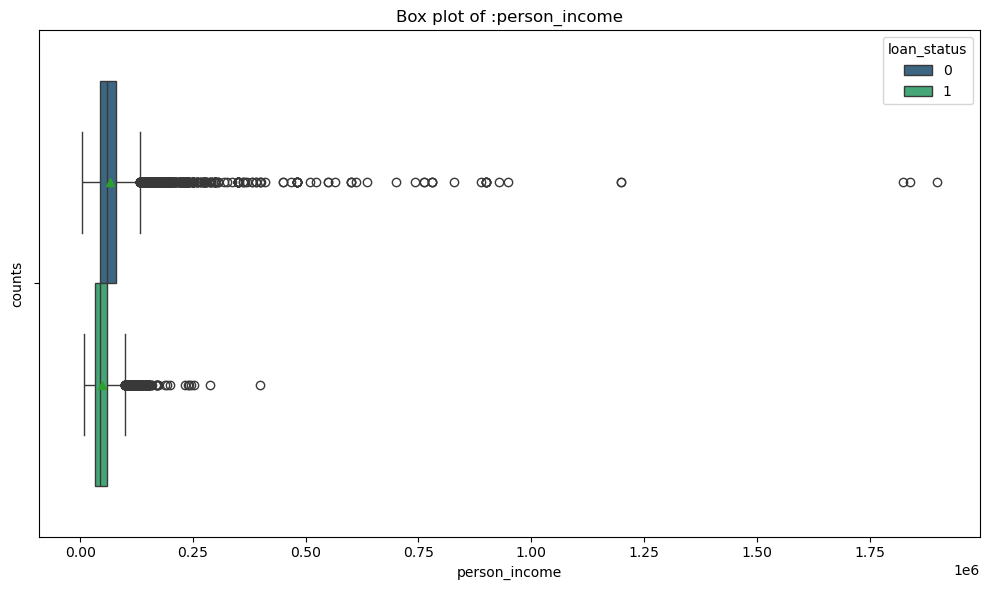

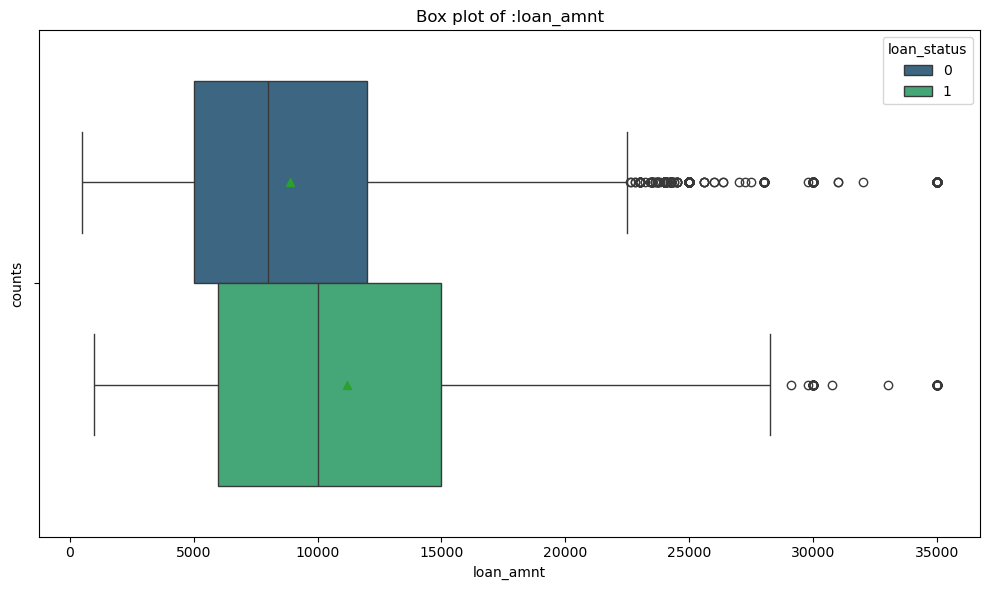

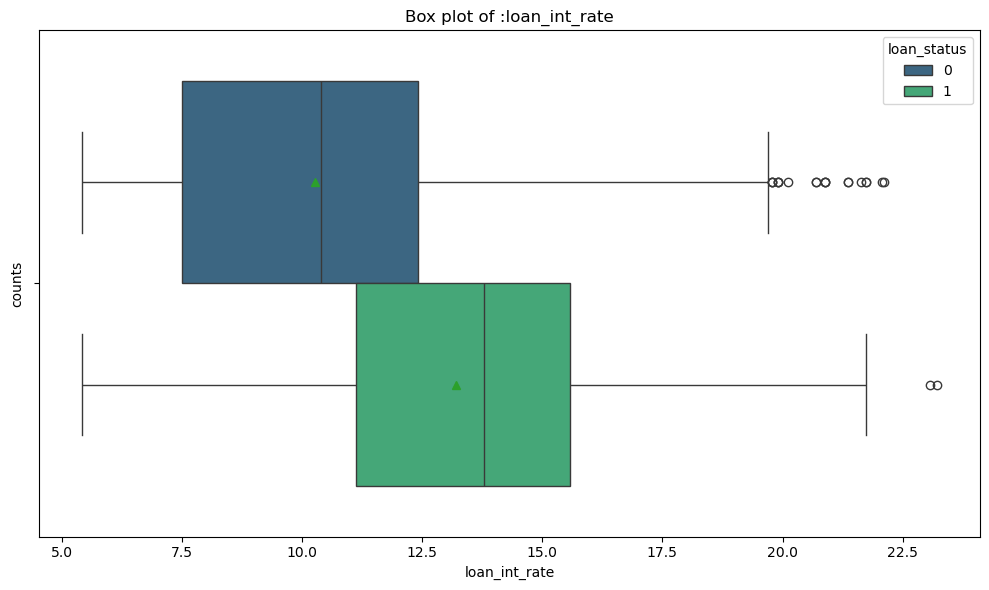

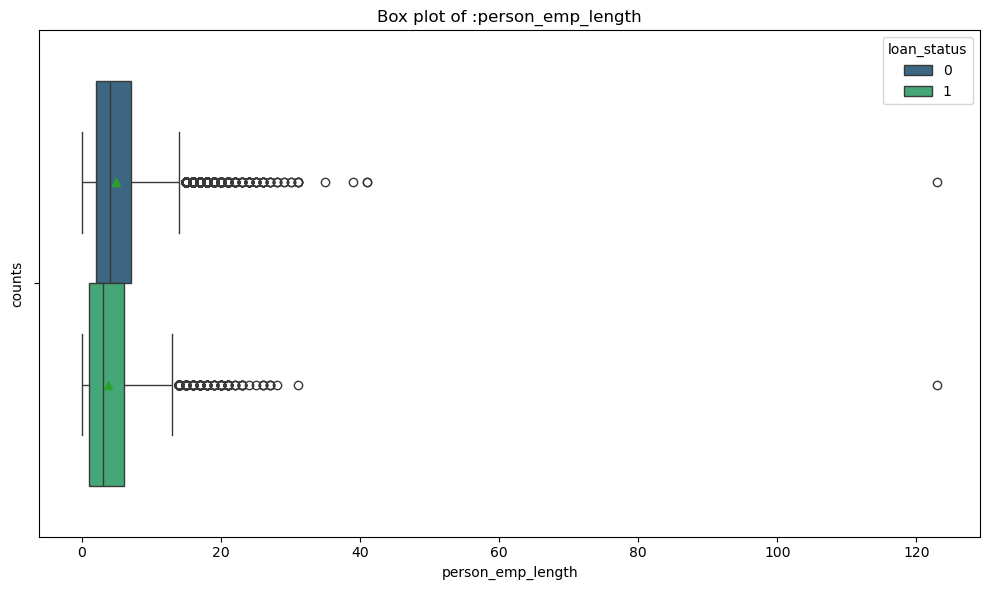

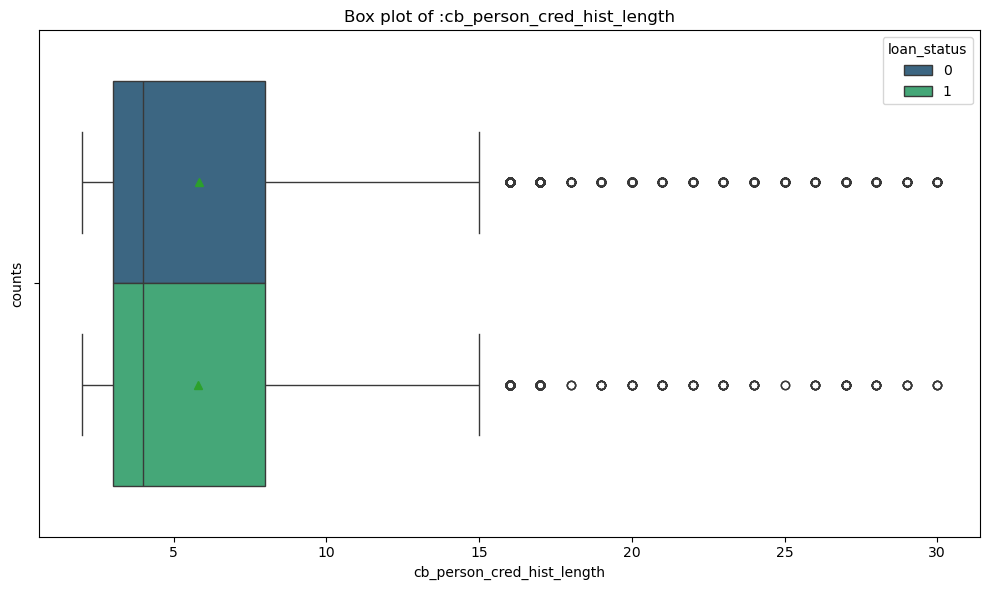

In [13]:
loan_box  = [
    'person_age', 'person_income', 'loan_amnt', 'loan_int_rate', 'person_emp_length','cb_person_cred_hist_length'
]
for boxcol in loan_box:
    plt.figure(figsize=(10,6))
    sns.boxplot(x= boxcol , data = train_df, hue = 'loan_status', palette='viridis', showmeans = True)
    plt.title(f'Box plot of :{boxcol}')
    plt.ylabel('counts')
    plt.tight_layout()
    plt.show()

outliers needs to be taken care of in the data later .......!!!!

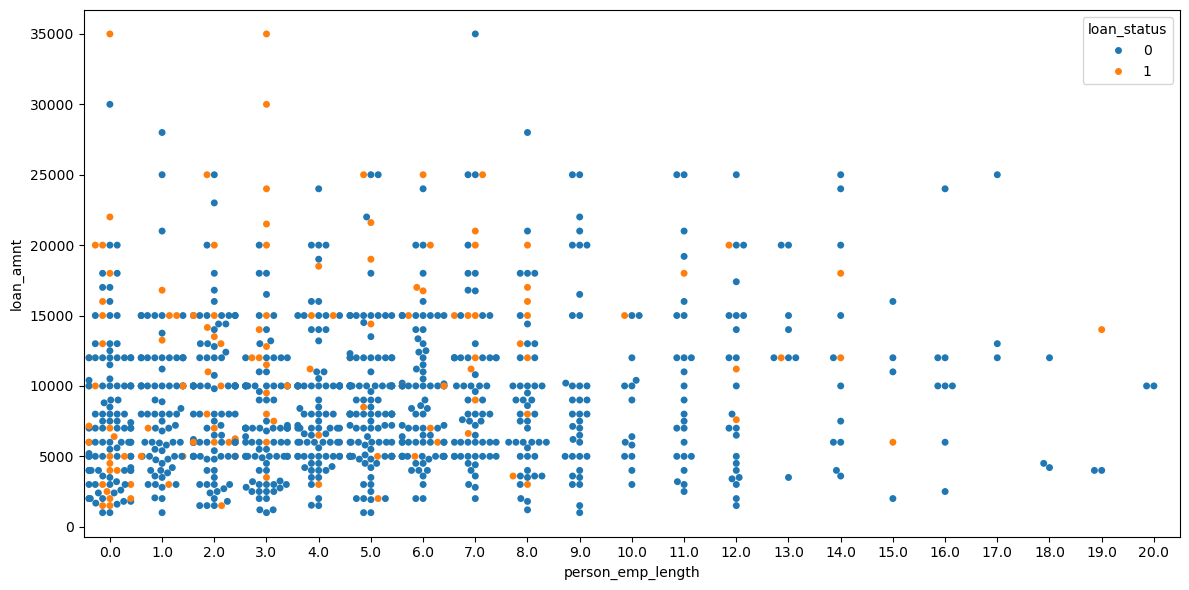

In [14]:
plt.figure(figsize=(12,6))
sns.swarmplot(data = train_df.sample(1000), y = 'loan_amnt' ,x = 'person_emp_length', hue = 'loan_status')
plt.tight_layout()
plt.show()

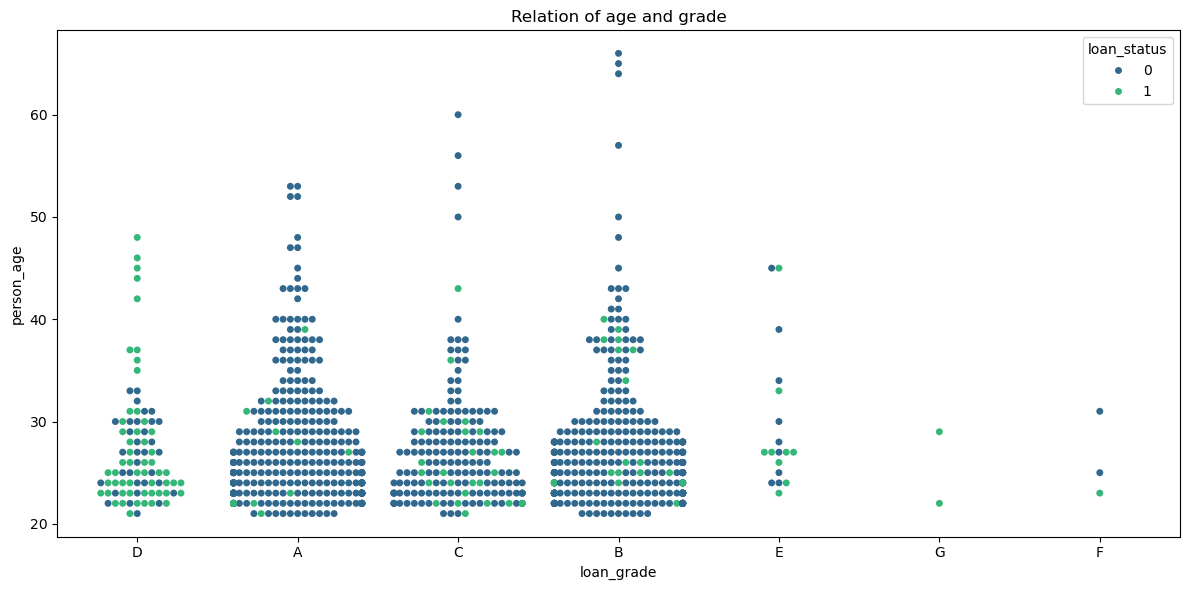

In [15]:
plt.figure(figsize=(12,6))
sns.swarmplot(data = train_df.sample(1000), x = 'loan_grade' ,y = 'person_age', hue = 'loan_status', palette='viridis')
plt.title('Relation of age and grade')
plt.tight_layout()
plt.show()

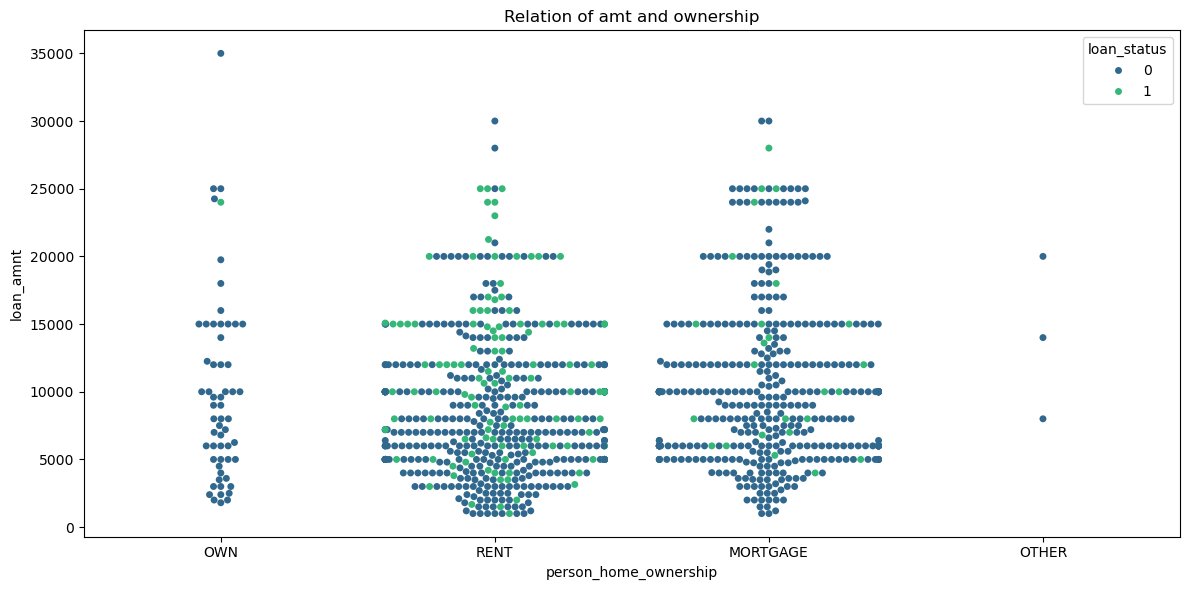

In [16]:
plt.figure(figsize=(12,6))
sns.swarmplot(data = train_df.sample(1000), x = 'person_home_ownership' ,y = 'loan_amnt', hue = 'loan_status', palette='viridis')
plt.title('Relation of amt and ownership')
plt.tight_layout()
plt.show()

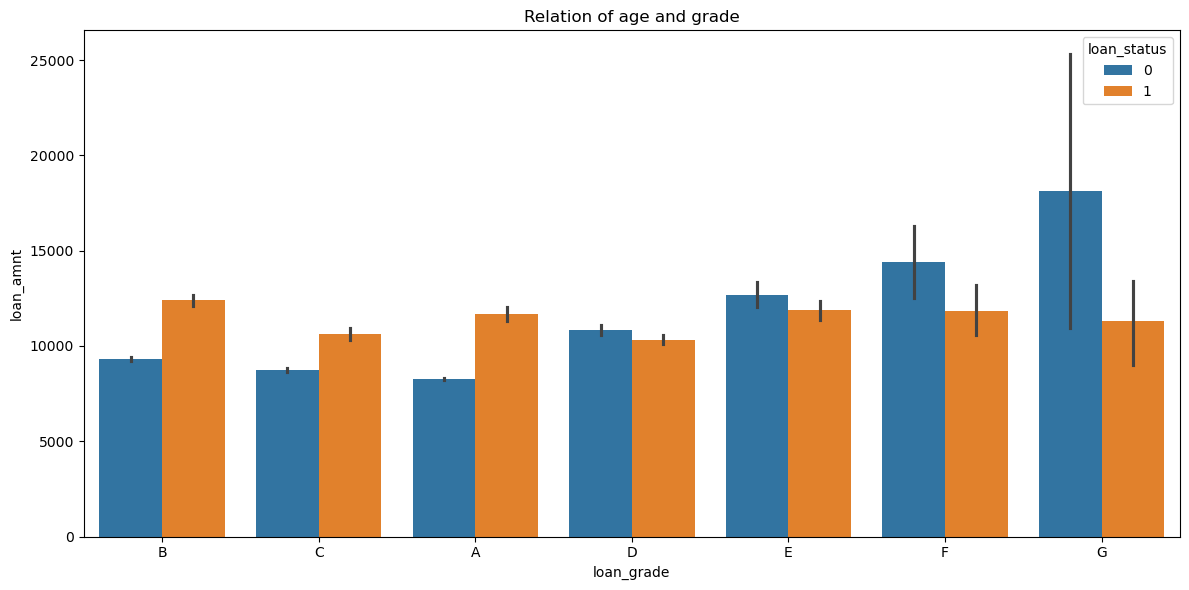

In [17]:
plt.figure(figsize=(12,6))
sns.barplot(data = train_df, y = 'loan_amnt' ,x = 'loan_grade',hue = 'loan_status' )
plt.title('Relation of age and grade')
plt.tight_layout()
plt.show()

### taking care of the obsurd outliers

In [18]:
train_df[train_df['person_age']>90]

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
47336,47336,123,36000,MORTGAGE,7.0,PERSONAL,B,6700,10.75,0.18,N,4,0


In [19]:
train_df[train_df['person_income']>1e6]

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
2093,2093,32,1200000,RENT,2.0,PERSONAL,A,10000,7.51,0.01,N,9,0
12404,12404,25,1839784,RENT,0.0,VENTURE,A,8000,8.00,0.04,N,3,0
17387,17387,22,1900000,MORTGAGE,6.0,EDUCATION,D,1500,15.62,0.00,Y,3,0
19060,19060,32,1200000,MORTGAGE,16.0,DEBTCONSOLIDATION,A,16000,6.92,0.13,N,5,0
37591,37591,29,1824000,MORTGAGE,8.0,DEBTCONSOLIDATION,C,6000,13.99,0.03,N,6,0


In [20]:
train_df[train_df['person_emp_length']>60]

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
41079,41079,28,60350,MORTGAGE,123.0,MEDICAL,D,25000,15.95,0.35,Y,6,1
49252,49252,21,192000,MORTGAGE,123.0,VENTURE,B,20000,11.49,0.10,N,2,0


eliminating the outliers

In [21]:
train_df = train_df[train_df['person_age']<90].reset_index(drop=True)
train_df = train_df[train_df['person_income']<1e6].reset_index(drop=True)
train_df = train_df[train_df['person_emp_length']<60].reset_index(drop=True)

In [22]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,58637.0,29322.142811,16929.542514,0.00,14661.00,29322.00,43983.00,58644.00
person_age,58637.0,27.549295,6.020565,20.00,23.00,26.00,30.00,84.00
person_income,58637.0,63914.178317,35079.256206,4200.00,42000.00,58000.00,75600.00,948000.00
person_emp_length,58637.0,4.696796,3.898935,0.00,2.00,4.00,7.00,41.00
loan_amnt,58637.0,9217.224653,5563.436397,500.00,5000.00,8000.00,12000.00,35000.00
loan_int_rate,58637.0,10.677793,3.034637,5.42,7.88,10.75,12.99,23.22
loan_percent_income,58637.0,0.159245,0.091687,0.00,0.09,0.14,0.21,0.83
cb_person_cred_hist_length,58637.0,5.813701,4.029377,2.00,3.00,4.00,8.00,30.00
loan_status,58637.0,0.142385,0.349447,0.00,0.00,0.00,0.00,1.00


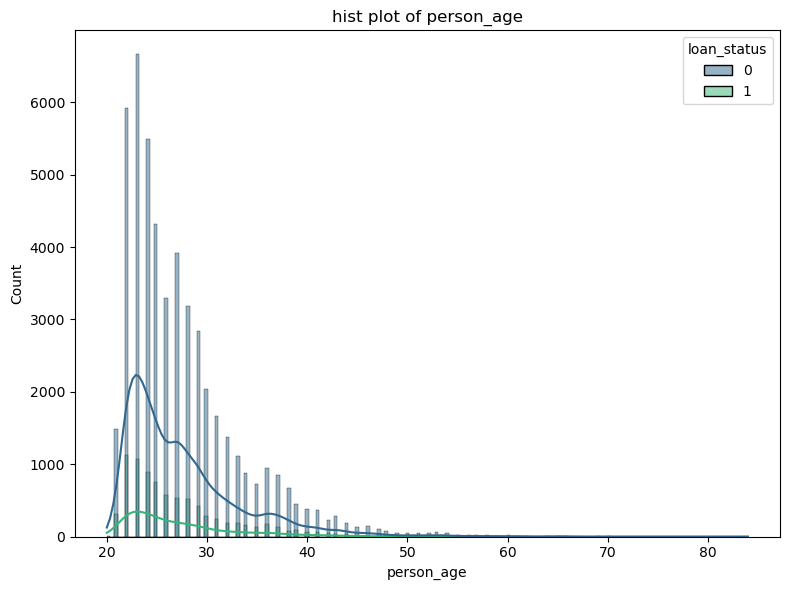

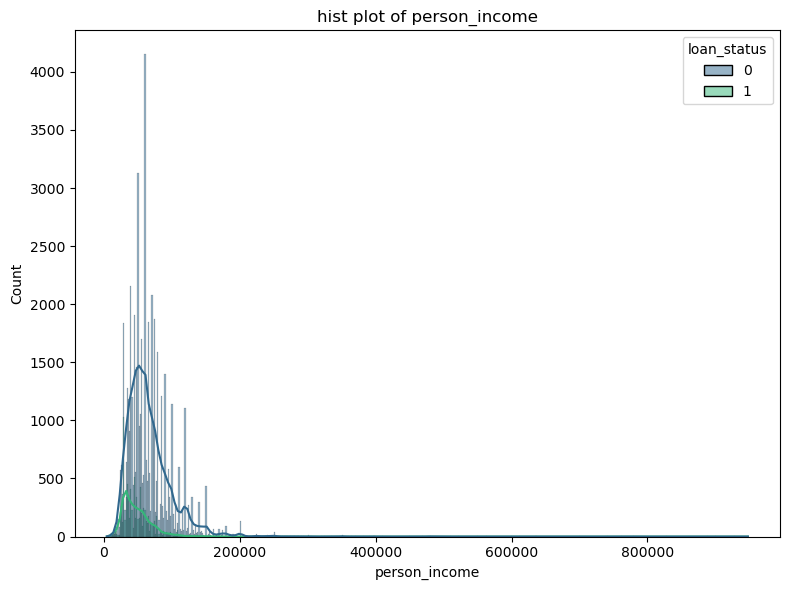

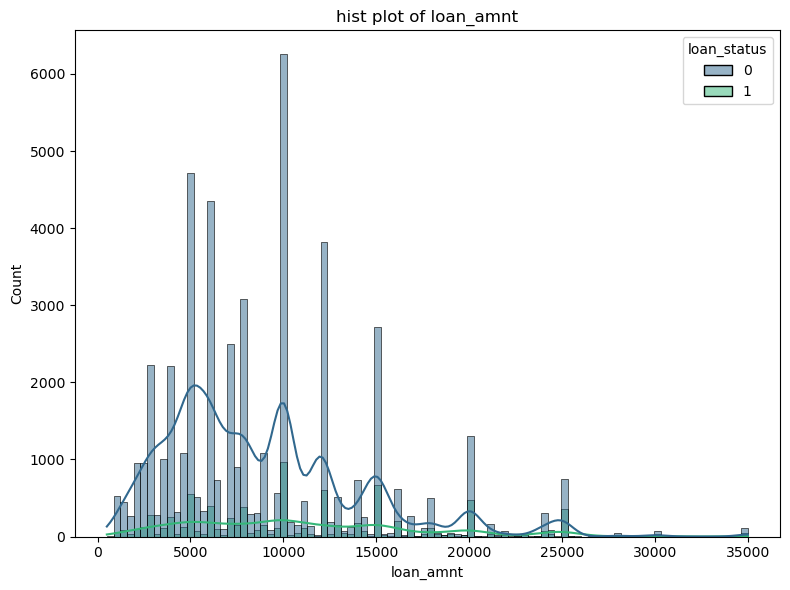

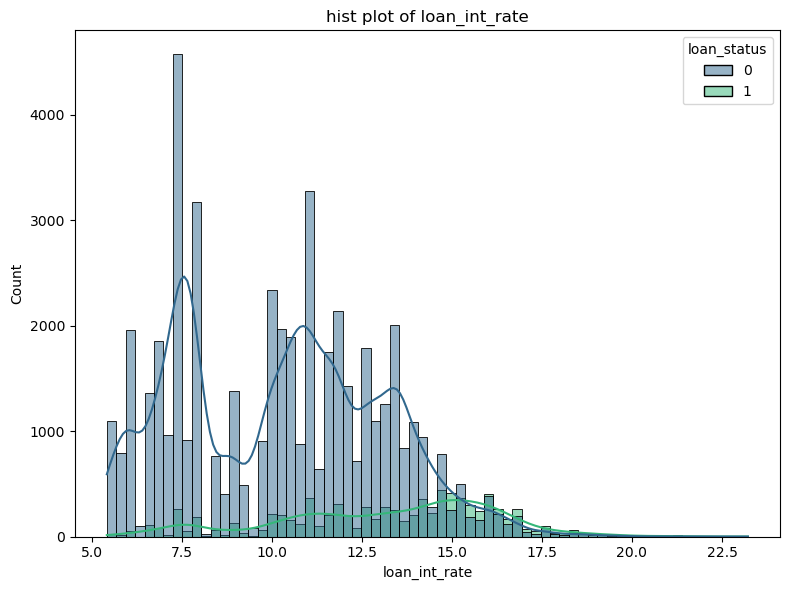

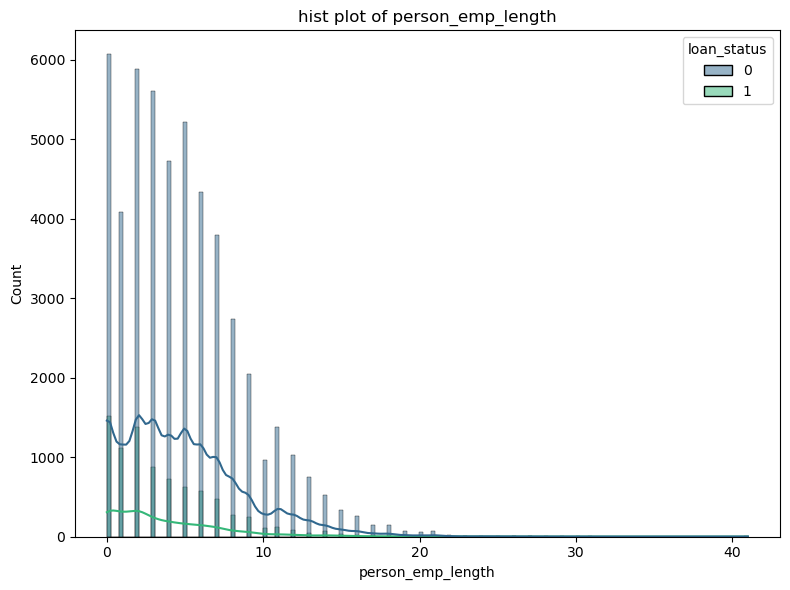

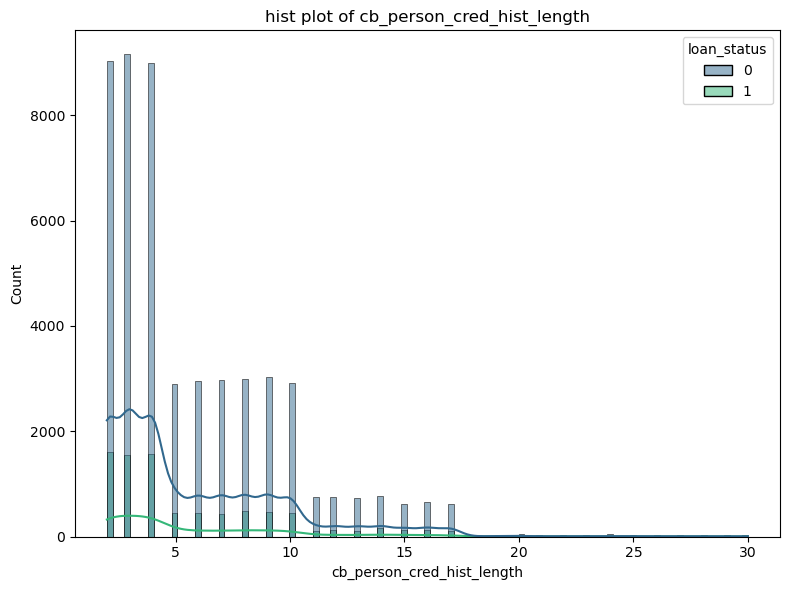

In [23]:
hist_plot  = [
    'person_age', 'person_income', 'loan_amnt', 'loan_int_rate','person_emp_length','cb_person_cred_hist_length'
]
for cols in hist_plot:
    plt.figure(figsize=(8,6))
    sns.histplot(data = train_df, x = cols, hue = 'loan_status', palette='viridis',kde = True)
    plt.title(f'hist plot of {cols}')
    plt.tight_layout()
    plt.show()

## Mapping out the remaining cols

In [24]:
on_file ={
    'N' : 0,
    'Y' : 1
    }

train_df['cb_person_default_on_file'] = train_df['cb_person_default_on_file'].map(on_file)
test_df['cb_person_default_on_file'] = test_df['cb_person_default_on_file'].map(on_file)


## seperating for categorical ohe and std

In [34]:
cat_cols = train_df.select_dtypes(['object']).columns
stand_col = ['person_age', 'person_income','person_emp_length', 'loan_amnt','loan_int_rate', 'loan_percent_income','cb_person_cred_hist_length']

Index(['person_home_ownership', 'loan_intent', 'loan_grade'], dtype='object')


## seperating the train and test data 

In [35]:
x_train = train_df.drop(columns='loan_status', axis =1)
y_train = train_df['loan_status']
x_test = test_df

## Importing the essentials for models and processing

In [36]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier


## Model selection and processing

In [ ]:
def testing_diff_model(x_train, y_train, x_test, models):
    pass

models = [
    LogisticRegression(max_iter=1000),
    SVC( gamma="auto"),
    XGBClassifier(n_estimators = 250),
    RandomForestClassifier(n_estimators=250),
    AdaBoostClassifier(learning_rate=.15,n_estimators=200),
    KNeighborsClassifier(n_neighbors=5),
    GradientBoostingClassifier(n_estimators=200, learning_rate=0.15)
    ]
